In [3]:
import pandas as pd

# Load datasets
static_data = pd.read_csv(r"datasets\static_client_data.csv")
historical_data = pd.read_csv(r"datasets\time_series_data.csv")
target_data = pd.read_csv(r"datasets\target_data.csv")

In [4]:
columns_to_merge = [
    'client_id', 'age', 'employment_status', 'annual_income',
    'debt_to_income_ratio', 'financial_knowledge_score',
    'risk_appetite', 'investment_horizon_years',
    'savings_rate', 'net_worth'
]

df_merged = historical_data.merge(static_data[columns_to_merge], on='client_id', how='left')

In [5]:
# Merge with target data (only taking 'recommended_strategy')
df_merged = df_merged.merge(target_data[["client_id", "recommended_strategy"]], on="client_id", how="left")

# Check the final dataset
print(df_merged.head())

                              client_id       month  portfolio_value  \
0  96c4c0a3-bb3f-4ac1-81ad-0850cd29911f  01-03-2022         89775.68   
1  96c4c0a3-bb3f-4ac1-81ad-0850cd29911f  01-04-2022         89685.96   
2  96c4c0a3-bb3f-4ac1-81ad-0850cd29911f  01-05-2022         90114.05   
3  96c4c0a3-bb3f-4ac1-81ad-0850cd29911f  01-06-2022         90338.07   
4  96c4c0a3-bb3f-4ac1-81ad-0850cd29911f  01-07-2022         92449.25   

   equity_allocation_pct  fixed_income_allocation_pct  monthly_contribution  \
0                  56.07                        43.93               1562.11   
1                  32.74                        67.26                772.74   
2                  56.71                        43.29                709.24   
3                  67.11                        32.89                799.51   
4                  23.90                        76.10               1923.33   

   market_volatility_index  macroeconomic_score  sentiment_index  age  \
0                  

In [4]:
# Define the path where you want to save the file
save_path = "datasets/classification_data.csv"

# Save the merged data as a CSV file
df_merged.to_csv(save_path, index=False)

print(f"File saved successfully at: {save_path}")

File saved successfully at: datasets/classification_data.csv


In [6]:
df_merged.columns
df_merged.head()

,client_id,month,portfolio_value,equity_allocation_pct,fixed_income_allocation_pct,monthly_contribution,market_volatility_index,macroeconomic_score,sentiment_index,age,employment_status,annual_income,debt_to_income_ratio,financial_knowledge_score,risk_appetite,investment_horizon_years,savings_rate,net_worth,recommended_strategy
0,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,01-03-2022,89775.68,56.07,43.93,1562.11,10.41,7.85,7.16,63,Salaried,61244.14,0.49,5,Medium,9,0.09,150946.53,Conservative
1,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,01-04-2022,89685.96,32.74,67.26,772.74,13.67,4.52,5.62,63,Salaried,61244.14,0.49,5,Medium,9,0.09,150946.53,Conservative
2,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,01-05-2022,90114.05,56.71,43.29,709.24,15.84,4.83,5.28,63,Salaried,61244.14,0.49,5,Medium,9,0.09,150946.53,Conservative
3,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,01-06-2022,90338.07,67.11,32.89,799.51,20.28,5.96,3.23,63,Salaried,61244.14,0.49,5,Medium,9,0.09,150946.53,Conservative
4,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,01-07-2022,92449.25,23.90,76.10,1923.33,29.31,7.04,4.52,63,Salaried,61244.14,0.49,5,Medium,9,0.09,150946.53,Conservative


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load data
df = pd.read_csv("datasets/classification_data.csv")

# Encode target
le = LabelEncoder()
df['target'] = le.fit_transform(df['recommended_strategy'])

# Drop static columns
static_cols = ['recommended_strategy', 'employment_status', 'risk_appetite']
df = df.drop(columns=static_cols)

# Group by client
grouped = df.groupby('client_id')

In [8]:
print(df.columns.tolist())

['client_id', 'month', 'portfolio_value', 'equity_allocation_pct', 'fixed_income_allocation_pct', 'monthly_contribution', 'market_volatility_index', 'macroeconomic_score', 'sentiment_index', 'age', 'annual_income', 'debt_to_income_ratio', 'financial_knowledge_score', 'investment_horizon_years', 'savings_rate', 'net_worth', 'target']


In [9]:
from sklearn.preprocessing import LabelEncoder

df_cleaned = df.copy()
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

# Drop 'client_id' and 'month' — not needed for modeling
categorical_cols = [col for col in categorical_cols if col not in ['client_id', 'month', 'target']]

# Apply LabelEncoder
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    le_dict[col] = le  # Optional: save encoders if needed later

In [10]:
print(df_cleaned.dtypes)

client_id                       object
month                           object
portfolio_value                float64
equity_allocation_pct          float64
fixed_income_allocation_pct    float64
monthly_contribution           float64
market_volatility_index        float64
macroeconomic_score            float64
sentiment_index                float64
age                              int64
annual_income                  float64
debt_to_income_ratio           float64
financial_knowledge_score        int64
investment_horizon_years         int64
savings_rate                   float64
net_worth                      float64
target                           int32
dtype: object


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical

# Load your preprocessed dataset (or use df directly if it's already loaded)
# df = pd.read_csv("your_file.csv")  # Skip if already in memory

# Drop 'client_id' and sort by time
df = df.sort_values(by=['client_id', 'month'])

# Group by client_id
grouped = df.groupby('client_id')

sequences = []
labels = []

for client_id, group in grouped:
    X = group.drop(columns=['client_id', 'month', 'target']).values
    y = group['target'].values[0]  # Assume same target for all months
    sequences.append(X)
    labels.append(y)

# Convert to NumPy arrays
X = np.array(sequences)
y = np.array(labels)

# Reshape and scale
num_samples, timesteps, num_features = X.shape
X_scaled = StandardScaler().fit_transform(X.reshape(-1, num_features)).reshape(num_samples, timesteps, num_features)

# One-hot encode target
y_encoded = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, num_features), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,403 (87.51 KB)

 Trainable params: 22,403 (87.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4697 - loss: 1.0567 - val_accuracy: 0.5175 - val_loss: 1.0158
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4988 - loss: 1.0311 - val_accuracy: 0.5163 - val_loss: 1.0201
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.5057 - loss: 1.0223 - val_accuracy: 0.5175 - val_loss: 1.0213
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.5166 - loss: 1.0089 - val_accuracy: 0.5088 - val_loss: 1.0220
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.5104 - loss: 1.0146 - val_accuracy: 0.5025 - val_loss: 1.0292
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.5034 - loss: 1.0128 - val_accuracy: 0.5063 - val_loss: 1.0280
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5055 - loss: 1.0134 - val_accuracy: 0.5000 - val_loss: 1.0308
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.4978 - loss: 1.0146 - v

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall
from keras.losses import CategoricalCrossentropy

# Optional: Use focal loss if highly imbalanced
# !pip install keras-losses  # only if needed
# from keras_losses import CategoricalFocalCrossentropy
# loss_fn = CategoricalFocalCrossentropy(gamma=2.0)

model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    BatchNormalization(),
    
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    BatchNormalization(),
    
    Dense(64, activation='relu'),
    Dropout(0.2),
    
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(
    loss=CategoricalCrossentropy(),  # or loss_fn
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy', Precision(), Recall()]
)

callbacks = [
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)
]

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    class_weight=cw_dict,
    callbacks=callbacks,
    verbose=1
)

# Evaluate
loss, acc, prec, rec = model.evaluate(X_test, y_test, verbose=1)
print(f"✅ Test Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")


Epoch 1/50


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.3319 - loss: 1.1001 - val_accuracy: 0.3025 - val_loss: 1.1025 - learning_rate: 5.0000e-04
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3074 - loss: 1.1006 - val_accuracy: 0.3219 - val_loss: 1.0972 - learning_rate: 5.0000e-04
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3632 - loss: 1.0975 - val_accuracy: 0.3406 - val_loss: 1.0976 - learning_rate: 5.0000e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3571 - loss: 1.0896 - val_accuracy: 0.3425 - val_loss: 1.0978 - learning_rate: 5.0000e-04
Epoch 5/50
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3965 - loss: 1.0826
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3963 - loss: 1.0828 - val_accuracy: 0.2825 - val_loss: 1.1115 - learning_rate: 5.0000e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3786 - 

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# 🔹 Assuming df is your original DataFrame
# Drop non-numeric + sort by client & time
df_sorted = df.sort_values(by=['client_id', 'month'])

# 🔹 Drop 'month' (datetime) and keep 'client_id' to group later
df_features = df_sorted.drop(columns=['month'])

# Encode target if it's categorical
if df_features['target'].dtype == 'object':
    le = LabelEncoder()
    df_features['target'] = le.fit_transform(df_features['target'])

# 🔹 Create sequences per client
clients = df_features['client_id'].unique()
sequence_data = []
sequence_labels = []

for client in clients:
    client_df = df_features[df_features['client_id'] == client].drop(columns=['client_id'])
    
    if len(client_df) < 3:  # Minimum sequence length
        continue
    
    features = client_df.drop(columns=['target']).values
    target = client_df['target'].values[-1]  # Predict final state
    
    sequence_data.append(features)
    sequence_labels.append(target)

# Convert to numpy arrays
X = np.array(sequence_data)
y = np.array(sequence_labels)

# 🔹 Scale features across all time steps
num_samples, timesteps, num_features = X.shape
X_reshaped = X.reshape(-1, num_features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped).reshape(num_samples, timesteps, num_features)

# 🔹 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 Build LSTM model
model = Sequential([
    LSTM(128, input_shape=(timesteps, num_features), return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # For multi-class
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 🔹 Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

# 🔹 Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[lr_scheduler]
)

# 🔹 Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.4681 - loss: 1.0548 - val_accuracy: 0.4919 - val_loss: 1.0420 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.5016 - loss: 1.0282 - val_accuracy: 0.4919 - val_loss: 1.0383 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.4953 - loss: 1.0314 - val_accuracy: 0.4925 - val_loss: 1.0370 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.5055 - loss: 1.0231 - val_accuracy: 0.4925 - val_loss: 1.0378 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.5092 - loss: 1.0203 - val_accuracy: 0.4925 - val_loss: 1.0405 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5145 - loss: 1.0150
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.5145 - lo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test)

# Evaluate
print("📌 Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

In [25]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# Build Transformer model
input_layer = Input(shape=(timesteps, num_features))
x = transformer_encoder(input_layer, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)
x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(len(np.unique(y)), activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', patience=3)]
)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Transformer Test Accuracy: {accuracy:.4f}")


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.3633 - loss: 1.3470 - val_accuracy: 0.4787 - val_loss: 1.0495 - learning_rate: 1.0000e-04
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4200 - loss: 1.1217 - val_accuracy: 0.4850 - val_loss: 1.0429 - learning_rate: 1.0000e-04
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4429 - loss: 1.0848 - val_accuracy: 0.4913 - val_loss: 1.0388 - learning_rate: 1.0000e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4597 - loss: 1.0666 - val_accuracy: 0.4919 - val_loss: 1.0373 - learning_rate: 1.0000e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4567 - loss: 1.0575 - val_accuracy: 0.4925 - val_loss: 1.0375 - learning_rate: 1.0000e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.4795 - loss: 1.0570 - val_accuracy: 0.4950 - val_loss: 1.0386 - learning_rate: 1.0000e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - acc

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

# === Example data shape ===
# X: shape (num_samples, timesteps, num_features)
# y: categorical integer labels (e.g., 0 to 5)

# Your preloaded data
# X, y = ...

# === Step 1: Scale features ===
num_samples, timesteps, num_features = X.shape
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, num_features)).reshape(num_samples, timesteps, num_features)

# === Step 2: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# === Step 3: Compute class weights (for imbalanced classes) ===
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# === Step 4: Model building ===
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    x_ff = layers.Dense(ff_dim, activation="relu")(x)
    x_ff = layers.Dropout(dropout)(x_ff)
    x_ff = layers.Dense(inputs.shape[-1])(x_ff)

    return layers.LayerNormalization(epsilon=1e-6)(x + x_ff)

def build_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Positional encoding
    positions = tf.range(start=0, limit=input_shape[0], delta=1)
    pos_embed = layers.Embedding(input_dim=input_shape[0], output_dim=input_shape[1])(positions)
    x = inputs + pos_embed

    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.1)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.1)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

# === Step 5: Compile and train ===
num_classes = len(np.unique(y_train))
input_shape = X_train.shape[1:]

model = build_model(input_shape, num_classes)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

lr_scheduler = callbacks.ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6, verbose=1)
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stop]
)

# === Step 6: Evaluate ===
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Transformer Test Accuracy: {test_acc:.4f}")

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.3166 - loss: 1.1371 - val_accuracy: 0.3419 - val_loss: 1.0964 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3465 - loss: 1.1006 - val_accuracy: 0.3262 - val_loss: 1.1001 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3505 - loss: 1.1022 - val_accuracy: 0.2594 - val_loss: 1.1060 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3350 - loss: 1.0961 - val_accuracy: 0.3650 - val_loss: 1.0875 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3488 - loss: 1.0949 - val_accuracy: 0.3269 - val_loss: 1.0970 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3466 - loss: 1.0980 - val_accuracy: 0.2738 - val_loss: 1.1011 - learning_rate: 0.0010
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3252 - loss: 1.

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers, models, callbacks
import tensorflow as tf

# Load your dataset
df = pd.read_csv("datasets/classification_data.csv")

# Inspect columns and identify the label column
print(df.columns)  # Check and replace the label column below accordingly
label_col = 'recommended_strategy'  

# Encode label
y = LabelEncoder().fit_transform(df[label_col])
X = df.drop(columns=[label_col])

# Drop non-numeric or ID columns if necessary
X = X.select_dtypes(include=[np.number])  # keep only numerical features

# Fill any missing values
X = X.fillna(X.mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input for Transformer: (samples, timesteps, features)
# We'll treat each row as a sequence of 1 step with many features
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train/validation/test split
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build Transformer model
def build_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Positional encoding
    positions = tf.range(start=0, limit=input_shape[0], delta=1)
    pos_embed = layers.Embedding(input_dim=input_shape[0], output_dim=input_shape[1])(positions)
    x = inputs + pos_embed

    # Transformer encoder block
    attention = layers.MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
    x = layers.Add()([x, attention])
    x = layers.LayerNormalization()(x)

    ffn = layers.Dense(64, activation="relu")(x)
    ffn = layers.Dense(input_shape[1])(ffn)
    x = layers.Add()([x, ffn])
    x = layers.LayerNormalization()(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

# Prepare model
num_classes = len(np.unique(y))
input_shape = X_train.shape[1:]

model = build_model(input_shape, num_classes)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Callbacks
lr_scheduler = callbacks.ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6, verbose=1)
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[lr_scheduler, early_stop],
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\n✅ Transformer Test Accuracy: {test_acc:.4f}")


Index(['client_id', 'month', 'portfolio_value', 'equity_allocation_pct',
       'fixed_income_allocation_pct', 'monthly_contribution',
       'market_volatility_index', 'macroeconomic_score', 'sentiment_index',
       'age', 'employment_status', 'annual_income', 'debt_to_income_ratio',
       'financial_knowledge_score', 'risk_appetite',
       'investment_horizon_years', 'savings_rate', 'net_worth',
       'recommended_strategy'],
      dtype='object')
Epoch 1/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.4979 - loss: 1.0313 - val_accuracy: 0.5046 - val_loss: 1.0189 - learning_rate: 0.0010
Epoch 2/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.5024 - loss: 1.0179 - val_accuracy: 0.5108 - val_loss: 1.0063 - learning_rate: 0.0010
Epoch 3/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.5131 - loss: 0.9985 - val_accuracy: 0.5233 - val_loss: 0.9870 - learning_rate: 0.0010
Epoch 4/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 68s 9ms/step - accuracy: 0.5243 - l

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers, models, callbacks
import tensorflow as tf

# Load dataset
df = pd.read_csv("datasets/classification_data.csv")

# Label column
label_col = 'recommended_strategy'
y = LabelEncoder().fit_transform(df[label_col])

# Drop ID and label columns
X = df.drop(columns=['client_id', label_col])

# Handle 'month' column if it exists
if 'month' in X.columns:
    X['month'] = pd.to_datetime(X['month'], errors='coerce')  # Convert to datetime
    X['month_num'] = X['month'].dt.month
    X['year'] = X['month'].dt.year
    X = X.drop(columns=['month'])

# Encode all categorical columns
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Fill missing values
X = X.fillna(X.mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for Transformer: (samples, timesteps=1, features)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train/val/test split
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build Transformer model
def build_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Positional encoding
    positions = tf.range(start=0, limit=input_shape[0], delta=1)
    pos_embed = layers.Embedding(input_dim=input_shape[0], output_dim=input_shape[1])(positions)
    x = inputs + pos_embed

    # Transformer encoder
    attention = layers.MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
    x = layers.Add()([x, attention])
    x = layers.LayerNormalization()(x)

    ffn = layers.Dense(64, activation="relu")(x)
    ffn = layers.Dense(input_shape[1])(ffn)
    x = layers.Add()([x, ffn])
    x = layers.LayerNormalization()(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

# Model prep
num_classes = len(np.unique(y))
input_shape = X_train.shape[1:]

model = build_model(input_shape, num_classes)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Callbacks
lr_scheduler = callbacks.ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6, verbose=1)
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[lr_scheduler, early_stop],
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\n✅ Transformer Test Accuracy: {test_acc:.4f}")


Epoch 1/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 57s 7ms/step - accuracy: 0.4984 - loss: 1.0297 - val_accuracy: 0.5065 - val_loss: 1.0106 - learning_rate: 0.0010
Epoch 2/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 58s 7ms/step - accuracy: 0.5140 - loss: 0.9960 - val_accuracy: 0.5303 - val_loss: 0.9649 - learning_rate: 0.0010
Epoch 3/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 55s 7ms/step - accuracy: 0.5414 - loss: 0.9507 - val_accuracy: 0.5579 - val_loss: 0.9226 - learning_rate: 0.0010
Epoch 4/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 57s 7ms/step - accuracy: 0.5682 - loss: 0.9120 - val_accuracy: 0.5829 - val_loss: 0.8938 - learning_rate: 0.0010
Epoch 5/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 58s 7ms/step - accuracy: 0.5894 - loss: 0.8795 - val_accuracy: 0.5921 - val_loss: 0.8832 - learning_rate: 0.0010
Epoch 6/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 57s 7ms/step - accuracy: 0.6043 - loss: 0.8557 - val_accuracy: 0.6081 - val_loss: 0.8477 - learning_rate: 0.0010
Epoch 7/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - accuracy: 0.6

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers, models, callbacks
import tensorflow as tf

# Load dataset
df = pd.read_csv("datasets/classification_data.csv")

# Label encode target
label_col = 'recommended_strategy'
y = LabelEncoder().fit_transform(df[label_col])

# Drop ID and label columns
X = df.drop(columns=['client_id', label_col])

# Handle 'month' column if exists
if 'month' in X.columns:
    X['month'] = pd.to_datetime(X['month'], errors='coerce')
    X['month_num'] = X['month'].dt.month
    X['year'] = X['month'].dt.year
    X = X.drop(columns=['month'])

# Encode categorical string columns
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Fill missing values
X = X.fillna(X.mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for Transformer: (samples, timesteps=1, features)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train/val/test split
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build tuned Transformer model
def build_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Positional Encoding
    positions = tf.range(start=0, limit=input_shape[0], delta=1)
    pos_embed = layers.Embedding(input_dim=input_shape[0], output_dim=input_shape[1])(positions)
    x = inputs + pos_embed

    # Transformer Encoder Block
    attention = layers.MultiHeadAttention(num_heads=8, key_dim=64)(x, x)
    x = layers.Add()([x, attention])
    x = layers.LayerNormalization()(x)

    ffn = layers.Dense(128, activation="relu")(x)
    ffn = layers.Dropout(0.3)(ffn)
    ffn = layers.Dense(input_shape[1])(ffn)
    x = layers.Add()([x, ffn])
    x = layers.LayerNormalization()(x)

    # Output Layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

# Prepare model
num_classes = len(np.unique(y))
input_shape = X_train.shape[1:]

model = build_model(input_shape, num_classes)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Callbacks
lr_scheduler = callbacks.ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6, verbose=1)
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[lr_scheduler, early_stop],
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\n✅ Tuned Transformer Test Accuracy: {test_acc:.4f}")

Epoch 1/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 57s 7ms/step - accuracy: 0.4968 - loss: 1.0347 - val_accuracy: 0.5049 - val_loss: 1.0232 - learning_rate: 0.0010
Epoch 2/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - accuracy: 0.5065 - loss: 1.0206 - val_accuracy: 0.5079 - val_loss: 1.0123 - learning_rate: 0.0010
Epoch 3/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 56s 7ms/step - accuracy: 0.5077 - loss: 1.0136 - val_accuracy: 0.5155 - val_loss: 1.0006 - learning_rate: 0.0010
Epoch 4/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 55s 7ms/step - accuracy: 0.5137 - loss: 1.0039 - val_accuracy: 0.5204 - val_loss: 0.9899 - learning_rate: 0.0010
Epoch 5/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 58s 7ms/step - accuracy: 0.5165 - loss: 0.9961 - val_accuracy: 0.5254 - val_loss: 0.9764 - learning_rate: 0.0010
Epoch 6/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - accuracy: 0.5212 - loss: 0.9872 - val_accuracy: 0.5282 - val_loss: 0.9666 - learning_rate: 0.0010
Epoch 7/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - accuracy: 0.5

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers, models, callbacks
import tensorflow as tf

# Load dataset
df = pd.read_csv("datasets/classification_data.csv")

# Label column
label_col = 'recommended_strategy'
y = LabelEncoder().fit_transform(df[label_col])

# Feature Engineering
df["income_to_networth_ratio"] = df["annual_income"] / (df["net_worth"] + 1e-6)
df["adjusted_debt_to_income"] = df["debt_to_income_ratio"] * df["annual_income"]
df["investment_savings_ratio"] = df["portfolio_value"] / (df["savings_rate"] + 1e-6)

# Clip to avoid negative values
df["annual_income"] = df["annual_income"].clip(lower=0)
df["net_worth"] = df["net_worth"].clip(lower=0)

# Binned Categorical Features
df["age_group"] = pd.cut(
    df["age"], bins=[18, 35, 55, np.inf], labels=["Young", "Mid-age", "Senior"], include_lowest=True
)
df["income_group"] = pd.cut(
    df["annual_income"], bins=[0, 50000, 150000, np.inf], labels=["Low", "Medium", "High"], include_lowest=True
)
df["net_worth_level"] = pd.cut(
    df["net_worth"], bins=[0, 50000, 200000, np.inf], labels=["Poor", "Stable", "Wealthy"], include_lowest=True
)

# Aggregated Scores
df["total_financial_score"] = (
    df["financial_knowledge_score"] +
    df["macroeconomic_score"] +
    df["sentiment_index"]
)

df["total_allocation_pct"] = (
    df["equity_allocation_pct"] + df["fixed_income_allocation_pct"]
)

# Drop ID and target label
X = df.drop(columns=['client_id', label_col])

# Handle 'month' column if exists
if 'month' in X.columns:
    X['month'] = pd.to_datetime(X['month'], errors='coerce')
    X['month_num'] = X['month'].dt.month
    X['year'] = X['month'].dt.year
    X = X.drop(columns=['month'])

# Encode all object and categorical columns
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Fill missing values
X = X.fillna(X.mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for Transformer input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build Transformer model
def build_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Positional encoding (for 1 timestep, positional encoding has little effect but kept for structure)
    positions = tf.range(start=0, limit=input_shape[0], delta=1)
    pos_embed = layers.Embedding(input_dim=input_shape[0], output_dim=input_shape[1])(positions)
    x = inputs + pos_embed

    # Transformer encoder block
    attention = layers.MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
    x = layers.Add()([x, attention])
    x = layers.LayerNormalization()(x)

    ffn = layers.Dense(64, activation="relu")(x)
    ffn = layers.Dense(input_shape[1])(ffn)
    x = layers.Add()([x, ffn])
    x = layers.LayerNormalization()(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

# Compile Model
num_classes = len(np.unique(y))
input_shape = X_train.shape[1:]

model = build_model(input_shape, num_classes)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Callbacks
lr_scheduler = callbacks.ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6, verbose=1)
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[lr_scheduler, early_stop],
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTransformer Test Accuracy: {test_acc:.4f}")

Epoch 1/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 199s 24ms/step - accuracy: 0.4999 - loss: 1.0268 - val_accuracy: 0.5084 - val_loss: 1.0011 - learning_rate: 0.0010
Epoch 2/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 130s 17ms/step - accuracy: 0.5248 - loss: 0.9808 - val_accuracy: 0.5519 - val_loss: 0.9382 - learning_rate: 0.0010
Epoch 3/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 126s 16ms/step - accuracy: 0.5647 - loss: 0.9175 - val_accuracy: 0.5903 - val_loss: 0.8844 - learning_rate: 0.0010
Epoch 4/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 161s 20ms/step - accuracy: 0.5995 - loss: 0.8624 - val_accuracy: 0.6146 - val_loss: 0.8441 - learning_rate: 0.0010
Epoch 5/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 136s 17ms/step - accuracy: 0.6253 - loss: 0.8200 - val_accuracy: 0.6337 - val_loss: 0.7954 - learning_rate: 0.0010
Epoch 6/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 100s 13ms/step - accuracy: 0.6431 - loss: 0.7826 - val_accuracy: 0.6496 - val_loss: 0.7713 - learning_rate: 0.0010
Epoch 7/50
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 66s 8ms/step - a

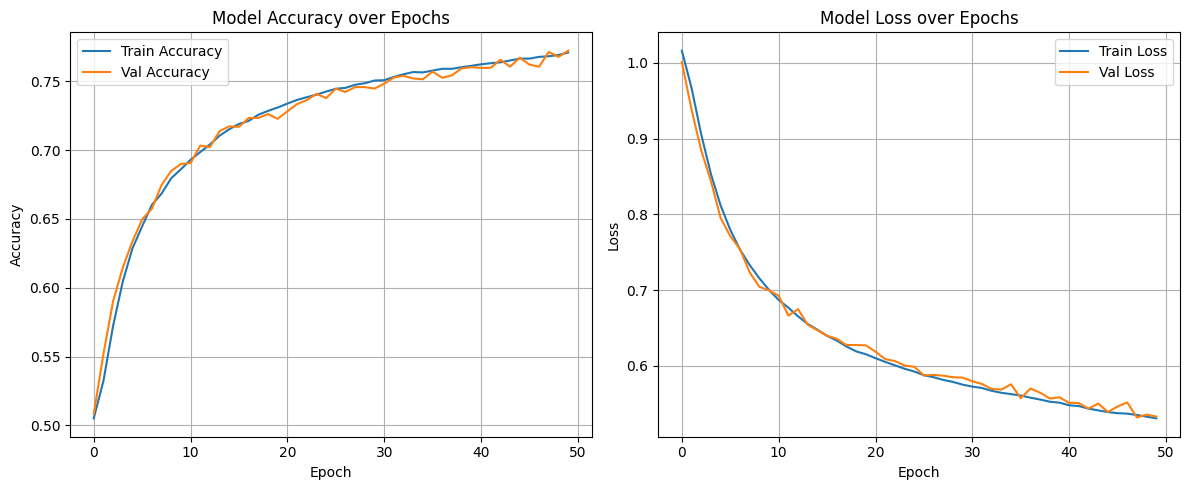

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.60      0.67     10780
           1       0.77      0.88      0.82     27025
           2       0.76      0.69      0.72     16195

    accuracy                           0.77     54000
   macro avg       0.76      0.72      0.74     54000
weighted avg       0.77      0.77      0.76     54000



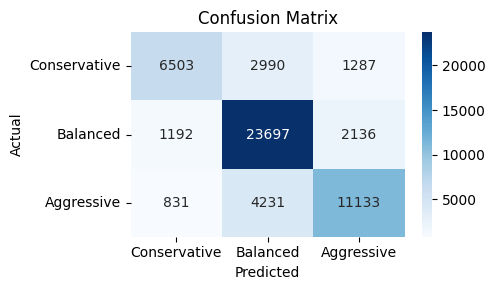

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: use actual class names
class_names = ['Conservative', 'Balanced', 'Aggressive']

# Plot
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# ----- Logistic Regression -----
print("🔹 Logistic Regression")
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# ----- Random Forest Classifier -----
print("\n🔹 Random Forest Classifier")
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

🔹 Logistic Regression
Accuracy: 0.32781944444444444
Confusion Matrix:
 [[ 5701  3628  4826]
 [13348  9689 13158]
 [ 7834  5603  8213]]
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.40      0.28     14155
           1       0.51      0.27      0.35     36195
           2       0.31      0.38      0.34     21650

    accuracy                           0.33     72000
   macro avg       0.35      0.35      0.32     72000
weighted avg       0.39      0.33      0.33     72000


🔹 Random Forest Classifier
Accuracy: 1.0
Confusion Matrix:
 [[14155     0     0]
 [    0 36195     0]
 [    0     0 21650]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14155
           1       1.00      1.00      1.00     36195
           2       1.00      1.00      1.00     21650

    accuracy                           1.00     72000
   macro avg       1.00      1.00      

In [46]:
import os
import joblib

# Recreate label encoders used during training
label_encoders = {}
for col in df.drop(columns=['client_id', label_col]).select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    le.fit(df[col].astype(str))
    label_encoders[col] = le

# Fit target encoder
target_le = LabelEncoder()
target_le.fit(df[label_col])

# Save directory
os.makedirs("saved_pipeline", exist_ok=True)

# Save scaler
joblib.dump(scaler, "saved_pipeline/scaler.pkl")

# Save label encoders for features
for col, encoder in label_encoders.items():
    joblib.dump(encoder, f"saved_pipeline/encoder_{col}.pkl")

# Save label encoder for target
joblib.dump(target_le, "saved_pipeline/target_encoder.pkl")

# Save column names
joblib.dump(X.columns.tolist(), "saved_pipeline/feature_columns.pkl")

# Save label classes (optional)
np.save("saved_pipeline/label_classes.npy", target_le.classes_)

# Save model
model.save("saved_pipeline/transformer_model.keras")

print("Full pipeline saved successfully.")

Full pipeline saved successfully.
